In [348]:
import requests
from bs4 import BeautifulSoup
import matplotlib as plt
import numpy as np
import math
import scipy.stats as stats
import psutil
import matplotlib.pyplot as plt
#file1 = open("15_min.txt", "a")  # append mode

In [349]:
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'

<IPython.core.display.Javascript object>


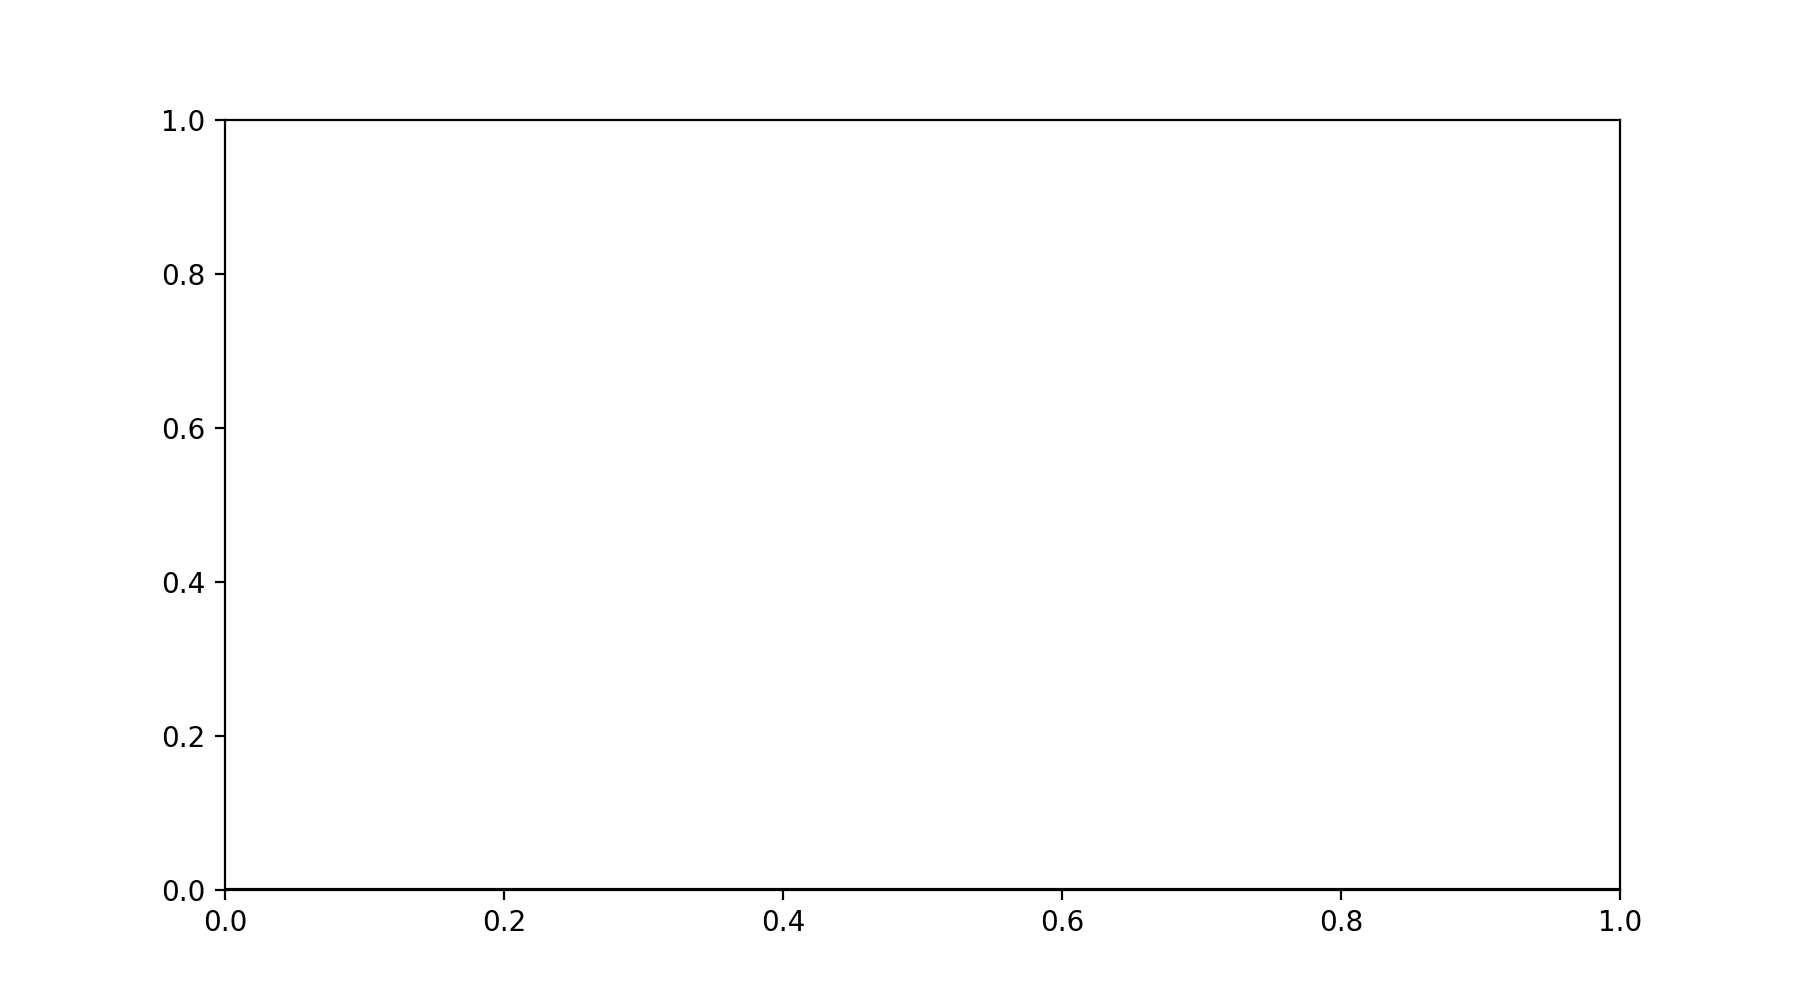

In [350]:
fig = plt.figure()
fig.set_size_inches(9, 5)
ax = fig.add_subplot(111)
plt.axhline(0, color='black');
fig.show()

In [344]:
from datetime import datetime
import time


headers = {
    'accept': '*/*',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.64 Safari/537.36 Edg/101.0.1210.53',
    'Accept-Language': 'en-US,en;q=0.9,it;q=0.8,es;q=0.7',
    'referer': 'https://www.google.com/',
    'cookie': 'DSID=AAO-7r4OSkS76zbHUkiOpnI0kk-X19BLDFF53G8gbnd21VZV2iehu-w_2v14cxvRvrkd_NjIdBWX7wUiQ66f-D8kOkTKD1BhLVlqrFAaqDP3LodRK2I0NfrObmhV9HsedGE7-mQeJpwJifSxdchqf524IMh9piBflGqP0Lg0_xjGmLKEQ0F4Na6THgC06VhtUG5infEdqMQ9otlJENe3PmOQTC_UeTH5DnENYwWC8KXs-M4fWmDADmG414V0_X0TfjrYu01nDH2Dcf3TIOFbRDb993g8nOCswLMi92LwjoqhYnFdf1jzgK0'
}

In [345]:
vix_float = []
sp_float = []
index_times = [] 
spread_vix_sp = []
x,y = [],[]
#i = 0

In [346]:
def get_numbers():

    for n in range(7000):

        now = datetime.now()
        now = now.strftime("%H:%M:%S")
        #"%d/%m/%Y %H:%M:%S

        
        url_vix = "https://finance.yahoo.com/quote/VXX/?p=VXX"
        url_sp = "https://finance.yahoo.com/quote/SPY/?p=SPY"
    
        response_vix = requests.get(url_vix, headers=headers)
        html_vix = response_vix.content

        response_sp = requests.get(url_sp,headers=headers)
        html_sp = response_sp.content
    
        soup_vix = BeautifulSoup(html_vix, "html.parser")
        soup_sp = BeautifulSoup(html_sp, "html.parser")
    
        price_vix = soup_vix.find('fin-streamer', {'class': 'Fw(b) Fz(36px) Mb(-4px) D(ib)'}).text
        price_sp = soup_sp.find('fin-streamer', {'class': 'Fw(b) Fz(36px) Mb(-4px) D(ib)'}).text

        #print(price_vix)
        #print(price_sp)
        
        price_vix = str(price_vix)
        price_sp = str(price_sp)

        price_vix = price_vix.replace(",", "")
        price_sp = price_sp.replace(",", "")
    
        price_vix_flt = float(price_vix)
        price_sp_flt = float(price_sp)
        
        vix_float.append(price_vix_flt)
        sp_float.append(price_sp_flt)
        index_times.append(now)
        
        spread = math.log(price_vix_flt) - math.log(price_sp_flt)
        spread_vix_sp.append(spread)
        
        #print(spread)
        #print(spread_nas_sp)
        final_z_score = round((spread - np.mean(spread_vix_sp))/np.std(spread_vix_sp),2)
        #print(final_z_score)
        
        x.append(n)
        y.append(final_z_score)
        
        ax.plot(x,y,color='b')
        fig.canvas.draw()
        print(final_z_score)
        #file1.write(now +','+price_nas + ',' + price_sp)
        ax.set_xlim(left=max(0, n-50), right=n+50)
        time.sleep(3)
       


In [351]:
if __name__ == "__main__":
    get_numbers()